# LG
# Day4 Class : Deep learning applied to audio II (CNN, RNN)

# class 4-1 : regularization - L1 & L2

make data for linear regression

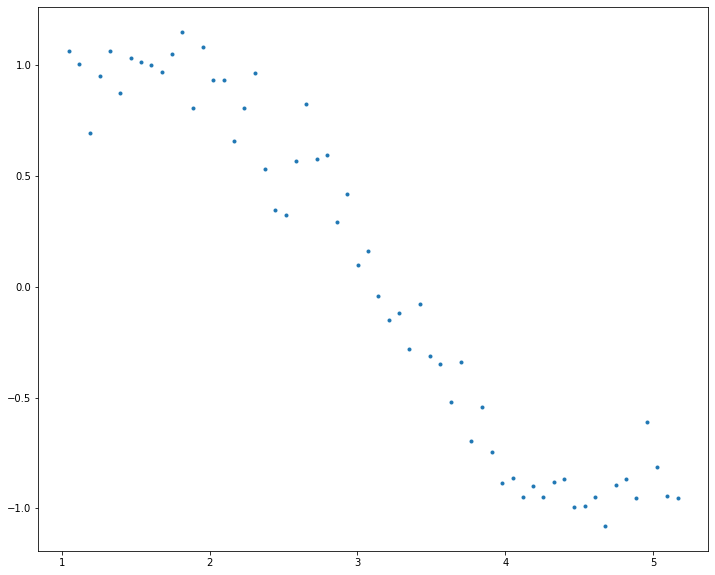

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

# Make fake data
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

# Make power n x data
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i

fit and show linear regression models while extending power with no regularization

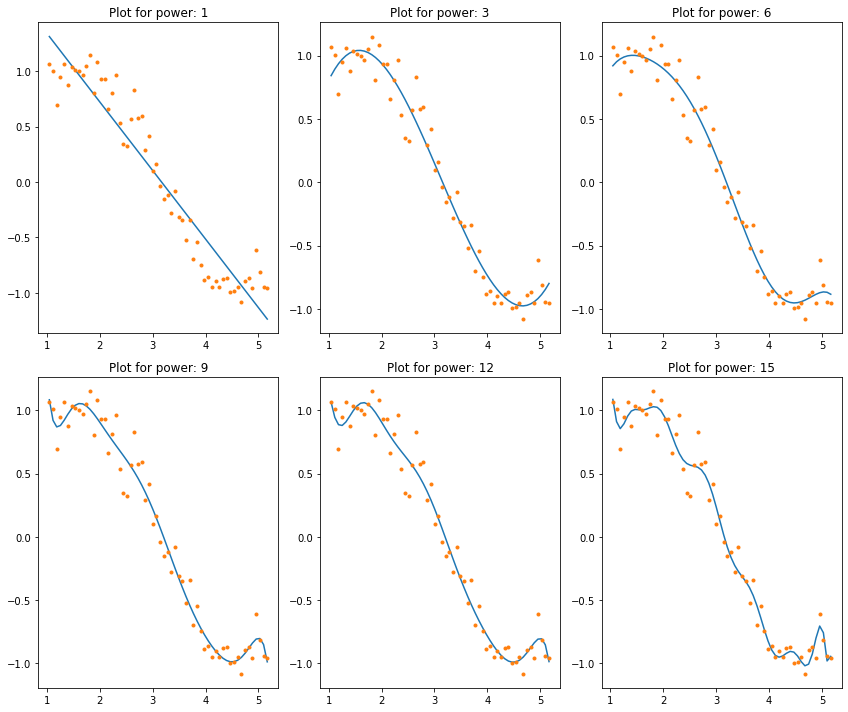

In [2]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

fit and show linear regression models with L1 regularization (lasso regression in linear regression) with poewr 15 while increasing alpha

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259036853, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4782818399057239, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190410706, tolerance: 0.00369480384218441
  positive)


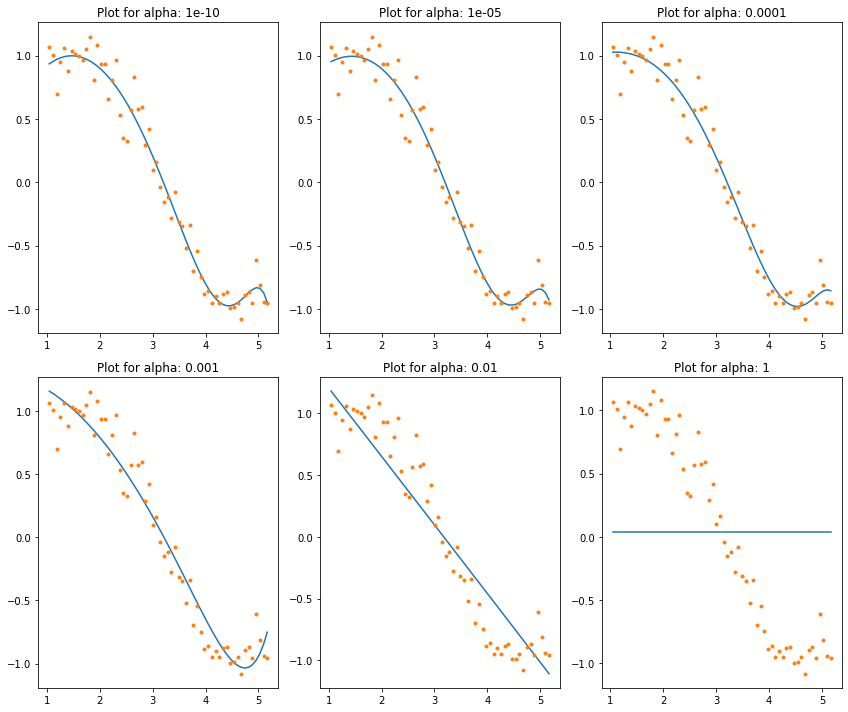

In [3]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

fit and show linear regression models with L2 regularization (ridge regression in linear regression) with poewr 15 while increasing alpha

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  overwrite_a=True).T


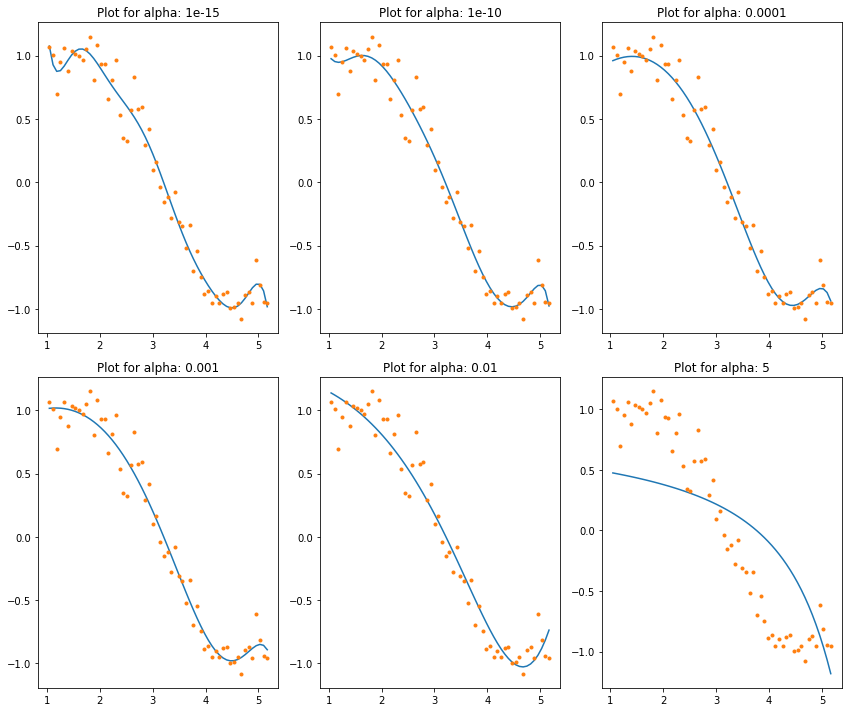

In [4]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

# class 4-2 : regularization - ADAM

define functions

In [0]:
def h(a,b,x): #hypothesis function
    return a*x+b

def mse(a,b,x,y): #loss function
    return np.mean((h(a,b,x) - y)**2)

def gradient(a,b,x,y): #mse derivatives
    return np.mean(x*(a*x+b-y), axis=-1), np.mean(a*x+b-y, axis=-1)

def generate_data(nb): #generate data with noise
    x = np.array([])
    y = np.array([])
    for i in range(nb):
        x = np.insert(x, len(x), i)
        y = np.insert(y, len(y), i/2 + np.random.rand()*20)
    return x,y

def shuffle(x,y):
    s = np.arange(len(x))
    np.random.shuffle(s)
    return x[s], y[s]



def vanilla_gradient_descent(a,b,x,y,lr=1e-5,epsilon=1e-4):
    prev_error = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a,b,x,y)

        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a,b,x,y)
        error = np.insert(error, len(error), prev_error)

        a -= lr * gradient_a
        b -= lr * gradient_b
    return a, b, error


def adam_gradient_descent(a, b, x, y, lr=1e-5, b1=0.9, b2=0.999, epsilon=1e-4):
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)

        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return a, b, error

make fake data

In [0]:
x, y = generate_data(1000)
# normalization
x -= np.mean(x)
x /= np.std(x)
y -= np.mean(y)
y /= np.std(y)

a_0, b_0 = np.random.rand(), np.random.rand()

show error plot for vanilla gradient descent

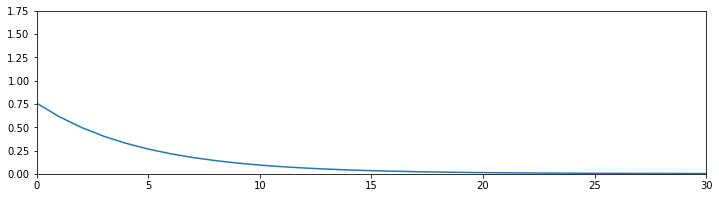

a = 0.9966699501660262 , b = 0.019440073709101714


In [7]:
'''
vanilla
'''
a, b, error = vanilla_gradient_descent(a_0, b_0, x, y, lr=1e-1)
prediction = h(a,b,x)

#plt.figure(figsize=(12, 3))
#plt.plot(x, prediction)
#plt.show()

plt.figure(figsize=(12, 3))
plt.xlim([0,30])
plt.ylim([0,1.75])
plt.plot(error)
plt.show()


print("a =",a,", b =",b)

show error plot for adam gradient descent

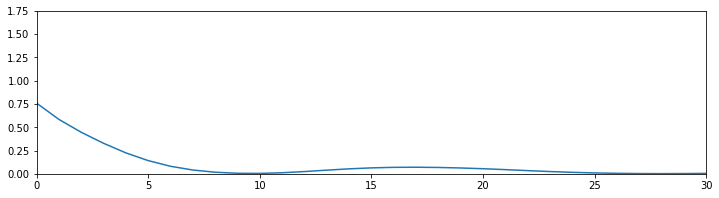

a = 0.9986754970076495 , b = -0.04645226807021374


In [8]:
'''
adam
'''
a, b, error = adam_gradient_descent(a_0, b_0, x, y, lr=1e-1)
prediction = h(a,b,x)


#plt.figure(figsize=(12, 3))
#plt.plot(x, prediction)
#plt.show()

plt.figure(figsize=(12, 3))
plt.xlim([0,30])

plt.ylim([0,1.75])
plt.plot(error)
plt.show()

print("a =",a,", b =",b)


# class 4-3 : regularization for speech mnist

In [0]:
# day3에서 했던 데이터 전처리와 동일한 과정입니다.


# !wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1CFKZf97pTozo2DNPnDsMcY0SVPvN8mj-' -O recordings_npy.zip
# !unzip -qq /content/recordings_npy.zip -d ./speech_mnist 

speech_mnist_data = []
speech_mnist_target = []


# preprocessing for all audio (extract mel-spectrogram)
speech_mnist = glob.glob('./speech_mnist/*.npy')
for item in speech_mnist:
  target, speaker, index = item.split('/')[-1].split('.npy')[0].split('_')
  
  wavs = np.load(item)
  mel = librosa.feature.melspectrogram(wavs, sr=8000, n_mels=80)
  
  speech_mnist_data.append(mel)
  speech_mnist_target.append(np.eye(10)[(int)(target)])

# 모든 mel-spectrogram의 데이터 길이 (시간)을 확인합니다. 가장 긴 mel-spec에 맞춰 나머지 mel을 zero-padding 해주기 위함입니다.
data_length = []
for item in speech_mnist_data:
  data_length.append(np.shape(item)[1])


print('max length : ' + (str)(np.max(data_length)))


# zero-pad all mel to max length
def pad(mel, max_length):
  if np.shape(mel)[1] > max_length:
    return mel[:,:max_length]
  else:
    return np.concatenate((mel, np.zeros((80, max_length-np.shape(mel)[1]))), axis=1)

max_length = np.max(data_length)
speech_mnist_data_pad = []
for item in speech_mnist_data:
  speech_mnist_data_pad.append(pad(item, max_length))


speech_mnist_data_final = np.reshape(speech_mnist_data_pad, (np.shape(speech_mnist_data_pad)[0],-1))
speech_mnist_target = np.asarray(speech_mnist_target)
print('shape of training data : ' + (str)(np.shape(speech_mnist_data_pad)))
print('shape of training data (flatten) : ' + (str)(np.shape(speech_mnist_data_final)))
print('shape of target data : ' + (str)(np.shape(speech_mnist_target)))

X_train, X_test, Y_train, Y_test = train_test_split(speech_mnist_data_final, speech_mnist_target, test_size=0.25, random_state=0)


max length : 36
shape of training data : (2000, 80, 36)
shape of training data (flatten) : (2000, 2880)
shape of target data : (2000, 10)


Train on 1350 samples, validate on 150 samples
Epoch 1/500
1350/1350 [==============================] - 8s 6ms/step - loss: 2.8881 - acc: 0.1430 - val_loss: 2.2209 - val_acc: 0.1800
Epoch 2/500
1350/1350 [==============================] - 0s 30us/step - loss: 2.1049 - acc: 0.2467 - val_loss: 2.1195 - val_acc: 0.2533
Epoch 3/500
1350/1350 [==============================] - 0s 26us/step - loss: 2.0597 - acc: 0.2970 - val_loss: 1.9809 - val_acc: 0.2867
Epoch 4/500
1350/1350 [==============================] - 0s 26us/step - loss: 1.9087 - acc: 0.3363 - val_loss: 1.9571 - val_acc: 0.2667
Epoch 5/500
1350/1350 [==============================] - 0s 26us/step - loss: 1.8804 - acc: 0.3467 - val_loss: 1.8722 - val_acc: 0.2933
Epoch 6/500
1350/1350 [==============================] - 0s 27us/step - loss: 1.7389 - acc: 0.3919 - val_loss: 1.7928 - val_acc: 0.3533
Epoch 7/500
1350/1350 [==============================] - 0s 27us/step - loss: 1.6563 - acc: 0.4452 - val_loss: 1.7584 - val_acc: 0.3600
Ep

Text(0.5, 1.0, 'baseline loss')

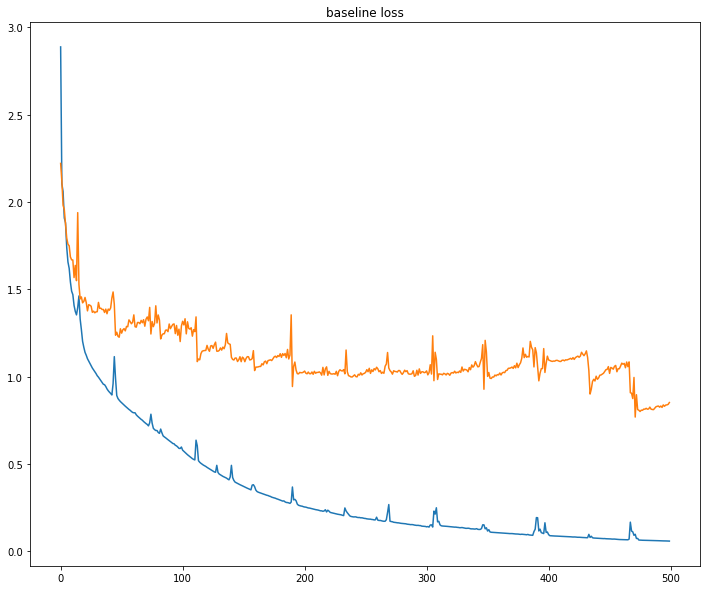

In [0]:
# baseline model 
input_size = np.shape(speech_mnist_data_final)[-1]
batch_size = 500    
hidden_neurons = 400
epochs = 500
classes = 10

model = Sequential()     
model.add(Dense(hidden_neurons, activation = 'relu', input_dim=input_size))
model.add(Dense(classes, activation = 'relu', input_dim=hidden_neurons))
model.add(Dense(classes, activation = 'softmax', input_dim=hidden_neurons))


model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')


hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('baseline loss')

Train on 1350 samples, validate on 150 samples
Epoch 1/500
1350/1350 [==============================] - 8s 6ms/step - loss: 2.8600 - acc: 0.1133 - val_loss: 2.3132 - val_acc: 0.2000
Epoch 2/500
1350/1350 [==============================] - 0s 31us/step - loss: 2.2186 - acc: 0.2719 - val_loss: 2.0412 - val_acc: 0.3600
Epoch 3/500
1350/1350 [==============================] - 0s 30us/step - loss: 1.9879 - acc: 0.3585 - val_loss: 1.9698 - val_acc: 0.4000
Epoch 4/500
1350/1350 [==============================] - 0s 29us/step - loss: 1.8862 - acc: 0.4037 - val_loss: 1.8876 - val_acc: 0.4267
Epoch 5/500
1350/1350 [==============================] - 0s 29us/step - loss: 1.7570 - acc: 0.4681 - val_loss: 1.8413 - val_acc: 0.4400
Epoch 6/500
1350/1350 [==============================] - 0s 29us/step - loss: 1.7121 - acc: 0.4674 - val_loss: 1.9452 - val_acc: 0.4600
Epoch 7/500
1350/1350 [==============================] - 0s 29us/step - loss: 1.6513 - acc: 0.4896 - val_loss: 1.6064 - val_acc: 0.4800
Ep

Text(0.5, 1.0, 'L2 regularization loss')

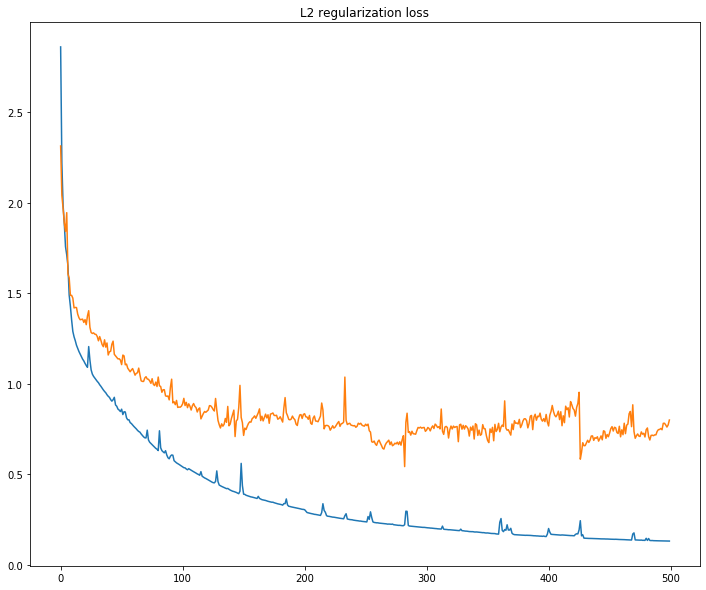

In [0]:
# baseline model with L2 regularization
from keras.regularizers import l2
input_size = 2880
batch_size = 500    
hidden_neurons = 400
epochs = 500

kernel_regularizer = l2(0.0001)

model = Sequential()     
model.add(Dense(hidden_neurons, activation = 'relu', input_dim=input_size, kernel_regularizer=kernel_regularizer))
model.add(Dense(classes, activation = 'relu', input_dim=hidden_neurons, kernel_regularizer=kernel_regularizer))
model.add(Dense(classes, activation = 'softmax', input_dim=hidden_neurons, kernel_regularizer=kernel_regularizer))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

hist_l2 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

plt.plot(hist_l2.history['loss'])
plt.plot(hist_l2.history['val_loss'])
plt.title('L2 regularization loss')

Train on 1350 samples, validate on 150 samples
Epoch 1/500
1350/1350 [==============================] - 8s 6ms/step - loss: 3.2935 - acc: 0.1452 - val_loss: 2.2419 - val_acc: 0.2000
Epoch 2/500
1350/1350 [==============================] - 0s 33us/step - loss: 2.1947 - acc: 0.2170 - val_loss: 2.1691 - val_acc: 0.2333
Epoch 3/500
1350/1350 [==============================] - 0s 29us/step - loss: 2.1252 - acc: 0.2578 - val_loss: 2.0853 - val_acc: 0.3067
Epoch 4/500
1350/1350 [==============================] - 0s 30us/step - loss: 1.9996 - acc: 0.3059 - val_loss: 1.9070 - val_acc: 0.3533
Epoch 5/500
1350/1350 [==============================] - 0s 29us/step - loss: 1.9329 - acc: 0.3356 - val_loss: 1.8910 - val_acc: 0.3733
Epoch 6/500
1350/1350 [==============================] - 0s 28us/step - loss: 1.8064 - acc: 0.3911 - val_loss: 1.8504 - val_acc: 0.4267
Epoch 7/500
1350/1350 [==============================] - 0s 33us/step - loss: 1.7765 - acc: 0.4230 - val_loss: 1.8515 - val_acc: 0.3800
Ep

Text(0.5, 1.0, 'Dropout regularization loss')

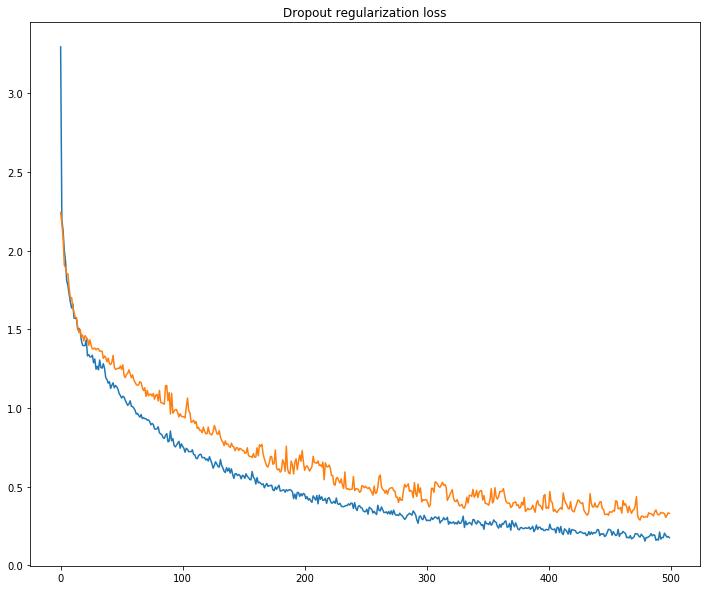

In [0]:
# baseline model with dropout regularization
from keras.regularizers import l2
from keras.layers import Dropout
input_size = 2880
batch_size = 500    
hidden_neurons = 400
epochs = 500

kernel_regularizer = l2(0.0001)

model = Sequential()     
model.add(Dense(hidden_neurons, activation = 'relu', input_dim=input_size))
model.add(Dropout(0.1))
model.add(Dense(classes, activation = 'relu', input_dim=hidden_neurons))
model.add(Dropout(0.1))
model.add(Dense(classes, activation = 'softmax', input_dim=hidden_neurons))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

hist_d = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

plt.plot(hist_d.history['loss'])
plt.plot(hist_d.history['val_loss'])
plt.title('Dropout regularization loss')

plot loss graph 

Text(0.5, 1.0, 'Dropout')

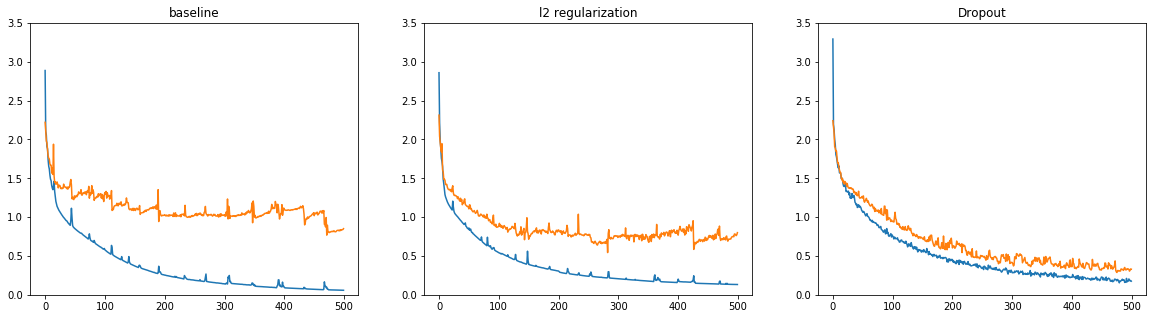

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim([0,3.5])
plt.title('baseline')

plt.subplot(1,3,2)
plt.plot(hist_l2.history['loss'])
plt.plot(hist_l2.history['val_loss'])
plt.ylim([0,3.5])
plt.title('l2 regularization')

plt.subplot(1,3,3)
plt.plot(hist_d.history['loss'])
plt.plot(hist_d.history['val_loss'])
plt.ylim([0,3.5])
plt.title('Dropout')

---

# class 4-4 : CNN with speech mnist


In [0]:
# download speech-mnist audio data
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1vD12AFfbA8vrTHeXb1IKk4wKbZwWDARg' -O recordings.zip
!mkdir speech_mnist
!unzip -qq /content/recordings.zip -d ./speech_mnist 

In [0]:
# speech mnist 데이터 살펴보기
import glob
import librosa 
import IPython.display as ipd
import librosa.display

speech_mnist = glob.glob('./speech_mnist/*.wav')
X, fs = librosa.load(speech_mnist[0], sr=None)

print('file name : ' + speech_mnist[0])
print('sampling rate : ' + (str)(fs))
ipd.Audio(X, rate=fs, autoplay=False)

file name : ./speech_mnist/4_jackson_42.wav
sampling rate : 8000


In [0]:
# download speech-mnist numpy data
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1CFKZf97pTozo2DNPnDsMcY0SVPvN8mj-' -O recordings_npy.zip
!unzip -qq /content/recordings_npy.zip -d ./speech_mnist 

In [0]:
# 학습 데이터 전처리

import glob
path = './speech_mnist/*.npy' # recording_npy 폴더 안에 .npy 확장자를 가진 파일을 지정합니다
audio_files = glob.glob(path) # 지정한 경로에 있는 파일을 glob.glob()를 이용해 리스트로 리턴합니다.
audio_files = sorted(glob.glob(path)) # 리스트 자료형 안에 있는 파일 이름들을 오름차순으로 정렬해주는 파이썬 함수입니다.
print('자료의 개수는 총 :', len(audio_files), '개') # audio_files 리스트 안에 총 몇 개의 자료가 있는지 확인합니다.

자료의 개수는 총 : 2000 개


In [0]:
import numpy as np 

audio_data = []
class_label = []

for item in audio_files:
  audio = np.load(item)
  audio_data.append(audio)
  label = item.split('/')[-1].split('_')[0]
  class_label.append((int)(label))

In [0]:
# 가장 긴 길이의 오디오를 찾는다.
length = []
for item in audio_data:
	length.append(len(item)) #for문을 돌려서 모든 데이터의 길이를 length라는 리스트 안에 저장합니다

max_length = np.max(length) # length라는 리스트 안에서 가장 긴 오디오의 길이를 리턴합니다
print('가장 긴 오디오의 길이는 :',max_length/8000,'seconds')

가장 긴 오디오의 길이는 : 2.28275 seconds


In [0]:
# 임의의 오디오를 특정 길이가 되도록 padding 하는 함수
def pad_audio(audio):
	length = len(audio)
	return np.concatenate((audio, np.zeros((max_length-length))))

In [0]:
# 이제, 모든 오디오를 패딩한 다음, mel spectrogram 을 뽑아서 X_all에 저장한다.
X_all = []
for item in audio_data:
	padded_audio = pad_audio(item)
	mel = librosa.feature.melspectrogram(padded_audio, n_fft=1024, hop_length=256)
	log_mel = np.log(mel+1e-3)
	X_all.append(np.expand_dims((log_mel), axis=-1))

In [0]:
# 마찬가지로, 모든 오디오의 정답지를 y_all에 저장한다. 이 때 one-hot encoding을 사용한다.
y_all = []
for item in class_label:
	y_all.append(np.eye(10)[item])

In [0]:
# 전체 X_all, y_all이 만들어졌다. 
# 이제 이들을 train set과 test set으로 분리한다. 비율은 9:1.

X_all = np.asarray(X_all)
y_all = np.asarray(y_all)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.1, random_state=123, stratify=y_all)


In [0]:
# 이제 학습 데이터 준비까지 끝났다. 학습을 위해, CNN 모델을 설계해보자. 

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.optimizers import Adam

input_dims = np.shape(X_train[0])

model = Sequential()
model.add(Conv2D(32,3,3,activation='relu', input_shape=input_dims))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(128, 72, ...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_l

In [0]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자. 
opt = Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 126, 70, 32)       320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 124, 68, 32)       9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 34, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 62, 34, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 60, 32, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 58, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 15, 32)       

In [0]:
# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, y_train, batch_size=64, nb_epoch=20, validation_split = 0.1, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1620 samples, validate on 180 samples
Epoch 1/20
1620/1620 [==============================] - 2s 1ms/step - loss: 2.3394 - acc: 0.1000 - val_loss: 2.3027 - val_acc: 0.0778
Epoch 2/20
1620/1620 [==============================] - 1s 739us/step - loss: 2.3041 - acc: 0.0926 - val_loss: 2.3031 - val_acc: 0.0889
Epoch 3/20
1620/1620 [==============================] - 1s 736us/step - loss: 2.3033 - acc: 0.1019 - val_loss: 2.3032 - val_acc: 0.0833
Epoch 4/20
1620/1620 [==============================] - 1s 730us/step - loss: 2.3029 - acc: 0.1068 - val_loss: 2.3025 - val_acc: 0.1333
Epoch 5/20
1620/1620 [==============================] - 1s 729us/step - loss: 2.2972 - acc: 0.0975 - val_loss: 2.2553 - val_acc: 0.1444
Epoch 6/20
1620/1620 [==============================] - 1s 748us/step - loss: 2.1346 - acc: 0.1895 - val_loss: 1.7986 - val_acc: 0.3222
Epoch 7/20
1620/1620 [==============================] - 1s 735us/step - loss: 1.7191 - acc: 0.3747 - val_loss: 1.2229 - val_acc: 0.5611
Epo

In [0]:
# test set을 이용해 실제 성능을 확인
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", score[1])

Test Accuracy: 0.955


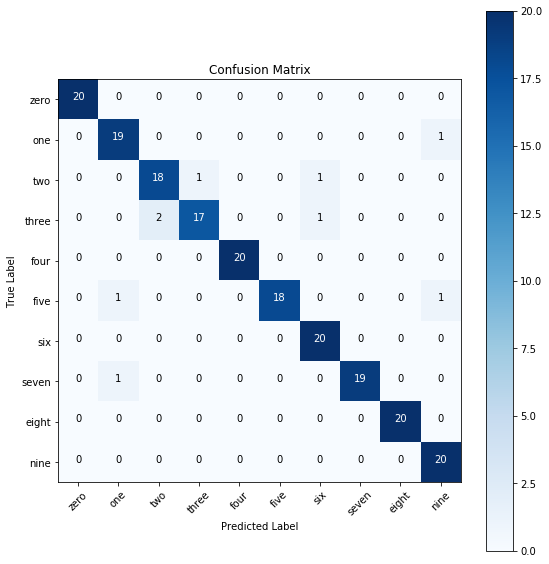

In [0]:
# confusion matrix 분석
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [0]:
# TSNE 분석
model_embedding = Model(inputs=[model.input], outputs=[model.layers[-3].output])
temp = model_embedding.predict(X_train)

from sklearn.manifold import TSNE
X = temp

X_embedded = TSNE(n_components=2,random_state=100).fit_transform(X)

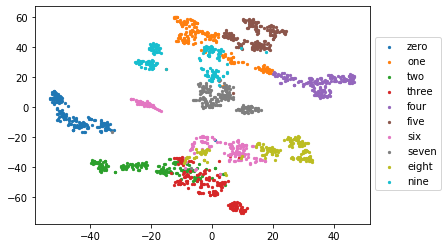

In [0]:
# 그리고 나서, 각 벡터들을 2차원 평면상에 클래스에 따라 그려보면 다음과 같다. 

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

plt.clf()
y_gt = np.argmax(y_train,axis=1)
for i in range(10):
	index = np.where(y_gt==i)[0]
	plt.scatter(X_embedded[index][:,0], X_embedded[index][:,1], c = colors[i], label=numbers[i], s=5)


plt.legend(bbox_to_anchor=(1,0.88))
plt.show()

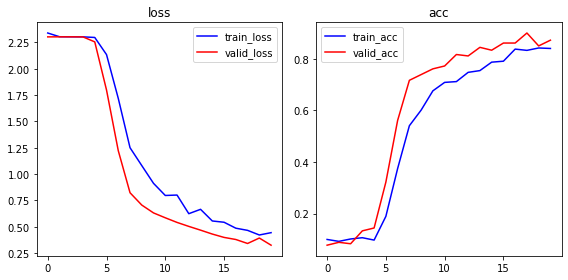

In [0]:
# loss 변화 확인
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label='train_loss')
plt.plot(hist.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label='train_acc')
plt.plot(hist.history['val_acc'], 'r-', label='valid_acc')
plt.legend()

plt.tight_layout()
plt.show()

---

# class 4-4 : RNN with speech mnist


In [10]:
# 학습 데이터 전처리

import glob
path = './speech_mnist/*.npy' # recording_npy 폴더 안에 .npy 확장자를 가진 파일을 지정합니다
audio_files = glob.glob(path) # 지정한 경로에 있는 파일을 glob.glob()를 이용해 리스트로 리턴합니다.
audio_files = sorted(glob.glob(path)) # 리스트 자료형 안에 있는 파일 이름들을 오름차순으로 정렬해주는 파이썬 함수입니다.
print('자료의 개수는 총 :', len(audio_files), '개') # audio_files 리스트 안에 총 몇 개의 자료가 있는지 확인합니다.

자료의 개수는 총 : 2000 개


In [0]:
import numpy as np 

audio_data = []
class_label = []

for item in audio_files:
  audio = np.load(item)
  audio_data.append(audio)
  label = item.split('/')[-1].split('_')[0]
  class_label.append((int)(label))

In [12]:
# 가장 긴 길이의 오디오를 찾는다.
length = []
for item in audio_data:
	length.append(len(item)) #for문을 돌려서 모든 데이터의 길이를 length라는 리스트 안에 저장합니다

max_length = np.max(length) # length라는 리스트 안에서 가장 긴 오디오의 길이를 리턴합니다
print('가장 긴 오디오의 길이는 :',max_length/8000,'seconds')

가장 긴 오디오의 길이는 : 2.28275 seconds


In [0]:
# 임의의 오디오를 특정 길이가 되도록 padding 하는 함수
def pad_audio(audio):
	length = len(audio)
	return np.concatenate((audio, np.zeros((max_length-length))))

In [0]:
import librosa
# 이제, 모든 오디오를 패딩한 다음, mfcc 을 뽑아서 X_all에 저장한다.
X_all = []
for item in audio_data:
	padded_audio = pad_audio(item)
	mfcc = librosa.feature.mfcc(padded_audio, sr=8000, n_mfcc=20)
	X_all.append(mfcc.T)

In [16]:
print(np.shape(X_all))

(2000, 36, 20)


In [0]:
# 마찬가지로, 모든 오디오의 정답지를 y_all에 저장한다. 이 때 one-hot encoding을 사용한다.
y_all = []
for item in class_label:
	y_all.append(np.eye(10)[item])

In [18]:
# 전체 X_all, y_all이 만들어졌다. 
# 이제 이들을 train set과 test set으로 분리한다. 비율은 9:1.

X_all = np.asarray(X_all)
y_all = np.asarray(y_all)
print(np.shape(X_all))

X_all = X_all/np.max(X_all)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.1, random_state=123)


(2000, 36, 20)


In [19]:
# 이제 학습 데이터 준비까지 끝났다. 학습을 위해, RNN 모델을 설계해보자. 

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.optimizers import Adam

input_dims = np.shape(X_train[0])

model = Sequential()
model.add(LSTM(128,activation='relu', input_shape=input_dims, return_sequences=True))
model.add(LSTM(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


In [20]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자. 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 36, 128)           76288     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 220,938
Trainable params: 220,938
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, y_train, batch_size=64, nb_epoch=100, validation_split = 0.1, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1620 samples, validate on 180 samples
Epoch 1/100





1620/1620 [==============================] - 13s 8ms/step - loss: 2.3056 - acc: 0.0926 - val_loss: 2.3034 - val_acc: 0.1167
Epoch 2/100
1620/1620 [==============================] - 3s 2ms/step - loss: 2.3034 - acc: 0.1000 - val_loss: 2.3041 - val_acc: 0.0667
Epoch 3/100
1620/1620 [==============================] - 3s 2ms/step - loss: 2.3027 - acc: 0.0920 - val_loss: 2.3039 - val_acc: 0.0944
Epoch 4/100
1620/1620 [==============================] - 3s 2ms/step - loss: 2.3026 - acc: 0.1019 - val_loss: 2.3055 - val_acc: 0.0889
Epoch 5/100
1620/1620 [==============================] - 3s 2ms/step - loss: 2.3025 - acc: 0.0938 - val_loss: 2.3050 - val_acc: 0.0889
Epoch 6/100
1620/1620 [==============================] - 3s 2ms/step - loss: 2.2686 - acc: 0.1204 - val_loss: 4.0807 - val_acc: 0.1333
Epoch 7/100
1620/1620 [=================

In [0]:
# test set을 이용해 실제 성능을 확인
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", score[1])

Test Accuracy: 0.95


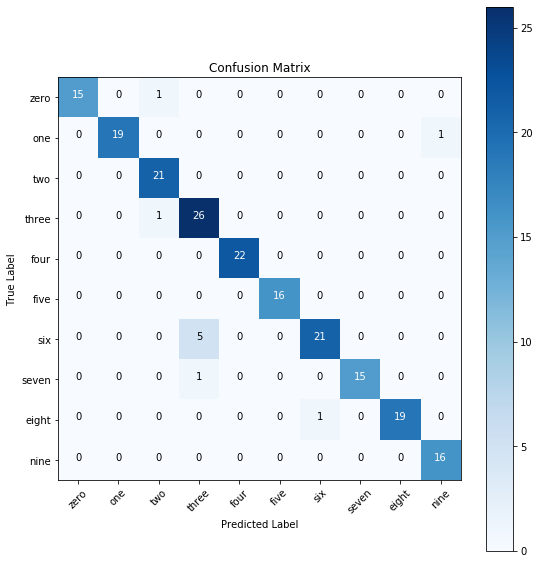

In [0]:
# confusion matrix 분석
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [0]:
# TSNE 분석
model_embedding = Model(inputs=[model.input], outputs=[model.layers[-4].output])
temp = model_embedding.predict(X_train)

from sklearn.manifold import TSNE
X = temp

X_embedded = TSNE(n_components=2,random_state=100).fit_transform(X)

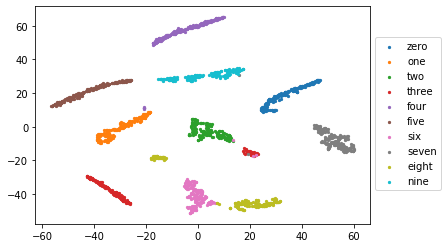

In [0]:
# 그리고 나서, 각 벡터들을 2차원 평면상에 클래스에 따라 그려보면 다음과 같다. 

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

plt.clf()
y_gt = np.argmax(y_train,axis=1)
for i in range(10):
	index = np.where(y_gt==i)[0]
	plt.scatter(X_embedded[index][:,0], X_embedded[index][:,1], c = colors[i], label=numbers[i], s=5)


plt.legend(bbox_to_anchor=(1,0.88))
plt.show()

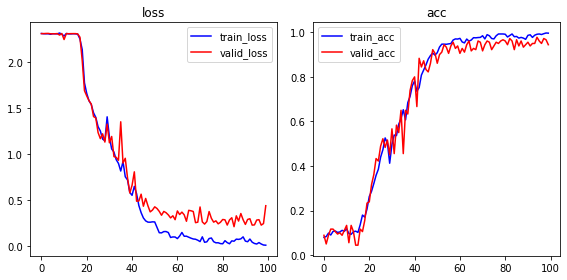

In [0]:
# loss 변화 확인
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label='train_loss')
plt.plot(hist.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label='train_acc')
plt.plot(hist.history['val_acc'], 'r-', label='valid_acc')
plt.legend()

plt.tight_layout()
plt.show()

# class 4-5 : Data augmentation with speech mnist

# aug1. sampling rate 변환 

In [0]:
audio_path = './speech_mnist/0_jackson_0.wav'
audio_1, sr_1 = librosa.load(audio_path, sr=None)
print('이 오디오의 샘플 레이트는 :', sr_1, 'Hz')
ipd.Audio(audio_1, rate=sr_1, autoplay=False)

이 오디오의 샘플 레이트는 : 8000 Hz


In [0]:
audio_path = './speech_mnist/0_jackson_0.wav'
random_sample = np.random.randint(5000, 10000)
print(random_sample)

audio_2, sr_2 = librosa.load(audio_path, sr=random_sample)
print('이 오디오의 샘플 레이트는 :', sr_2, 'Hz')
ipd.Audio(audio_2, rate=sr_2, autoplay=False)

8429
이 오디오의 샘플 레이트는 : 8429 Hz


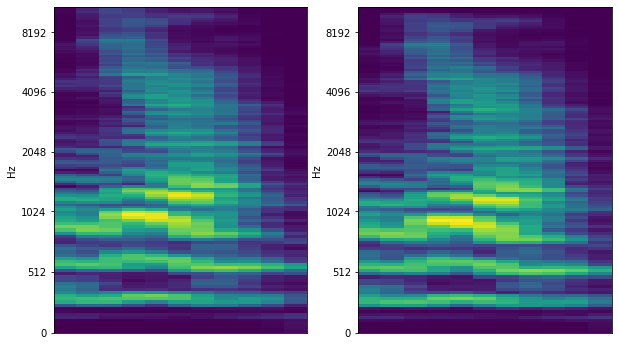

In [0]:
mel_1 = librosa.feature.melspectrogram(audio_1)
mel_2 = librosa.feature.melspectrogram(audio_2)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')

plt.show()

# aug2. pitch 변환

In [0]:
audio_path = './speech_mnist/0_jackson_0.wav'
audio, sr = librosa.load(audio_path, sr=None)
print('이 오디오의 샘플 레이트는 :', sr, 'Hz')
ipd.Audio(audio, rate=sr, autoplay=False)

이 오디오의 샘플 레이트는 : 8000 Hz


In [0]:
pitch_factor = 0.75 + (np.random.rand(1)*0.5)[0]
print(pitch_factor)
pitch_factor = 1
audio_shift = librosa.effects.pitch_shift(audio, sr, pitch_factor)
ipd.Audio(audio_shift, rate=sr, autoplay=False)

0.9484997124385721


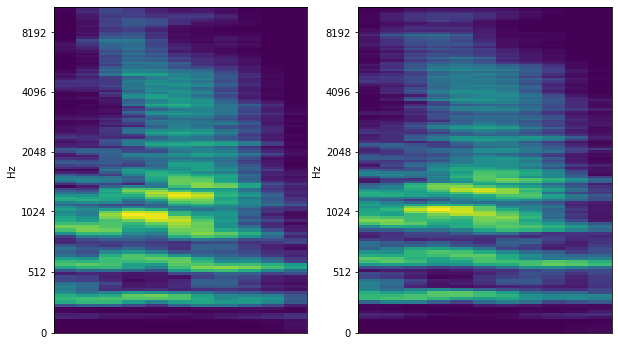

In [0]:
mel_1 = librosa.feature.melspectrogram(audio)
mel_2 = librosa.feature.melspectrogram(audio_shift)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')

plt.show()

# aug3. 배경소음 합성 + 시간 축 변환

**TAU Urban Acoustic Scenes 2019 dataset의 배경 소음 데이터셋 사용**


Airport

Indoor shopping mall

Metro station

Pedestrian street

Public square

Street with medium level of traffic

Travelling by a tram

Travelling by a bus

Travelling by an underground metro

Urban park



**시간 축 변환**

전체 오디오에서 실제 speech 가 있는 구간을 시간상에서 무작위로 배치

(speech가 전체 오디오의 정 가운데에 위치하지 않아도 감지하도록...)

In [0]:
audio_path = './speech_mnist/0_jackson_0.wav'
audio, sr = librosa.load(audio_path, sr=None)
#ipd.Audio(audio, rate=sr, autoplay=False)

!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1vD81Qm6mCfekYr4YUk2YblzAMYpwJ8Ec' -O noise.wav
bg_path = './noise.wav'
bg, sr = librosa.load(bg_path, sr=8000)
ipd.Audio(bg, rate=sr, autoplay=False)



0.6495745114668683


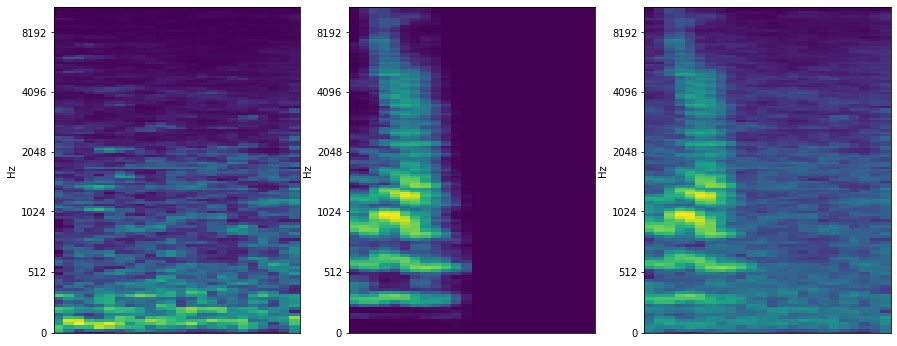

In [0]:
random_bg_location = np.random.randint(0, len(bg)-sr*2)
random_audio_location = np.random.randint(0, sr*1.5 - len(audio))

random_bg = bg[random_bg_location:int(random_bg_location+sr*1.5)]
random_audio = np.concatenate((np.concatenate((np.zeros(random_audio_location),audio)),np.zeros(int(sr*1.5 - random_audio_location - len(audio)))))


sum_factor = 0.3 + (np.random.rand(1)*0.5)[0]
print(sum_factor)
sum_factor = 4
audio_sum = np.add(random_bg*sum_factor,random_audio)


mel_1 = librosa.feature.melspectrogram(random_bg)
mel_2 = librosa.feature.melspectrogram(random_audio)
mel_3 = librosa.feature.melspectrogram(audio_sum)

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,3,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,3,3)
librosa.display.specshow(np.log(mel_3 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')

plt.show()


ipd.Audio(audio_sum, rate=sr, autoplay=False)

# aug4. 공간 잔향 합성

Diaz-Guerra, David, Antonio Miguel, and Jose R. Beltran. "gpuRIR: A python library for Room Impulse Response simulation with GPU acceleration." arXiv preprint arXiv:1810.11359 (2018).

In [0]:
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=12qCUW_Fagd-soNDk_ZbNFnQCESSm-wt5' -O reverb.wav

ir_path = './reverb.wav'
ir, sr = librosa.load(ir_path, sr=8000)
ipd.Audio(ir, rate=sr, autoplay=False)

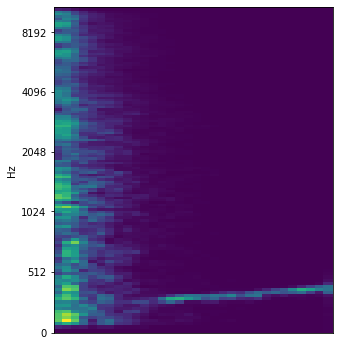

In [0]:
# 잔향 impulse response의 spectrogram 확인
mel_ir = librosa.feature.melspectrogram(ir)

plt.figure(figsize=(5,6))
librosa.display.specshow(np.log(mel_ir + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.show()

In [0]:
# tager audio에 잔향 convolution
audio_sum_conv = np.convolve(audio_sum,ir)
audio_sum_conv = audio_sum_conv[0:int(sr*1.5)]


ipd.Audio(audio_sum_conv, rate=sr, autoplay=False)

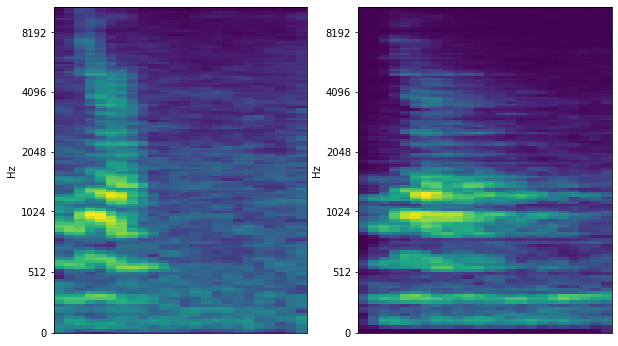

(128, 24)


In [0]:
# reverb convolution 전 후 spectrogram 비교
mel_1 = librosa.feature.melspectrogram(audio_sum)
mel_2 = librosa.feature.melspectrogram(audio_sum_conv)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.show()

print(np.shape(mel_2))

# aug5. spec augmentation


Park, Daniel S., et al. "Specaugment: A simple data augmentation method for automatic speech recognition." arXiv preprint arXiv:1904.08779 (2019)

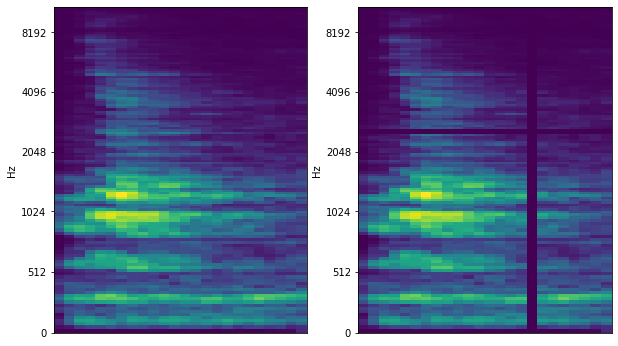

In [0]:
mel_spec = librosa.feature.melspectrogram(audio_sum_conv)

f_frame = np.random.randint(0, 32)
t_frame = np.random.randint(0,6)

f_location = np.random.randint(0,128-f_frame)
t_location = np.random.randint(0,24-t_frame)

for i in range(0,f_frame):
  mel_spec[f_location+i,:] = 0

for i in range(0,t_frame):
  mel_spec[:,t_location+t_frame] = 0

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(librosa.feature.melspectrogram(audio_sum_conv) + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_spec + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.show()
